# Data Collection, Exploration, and Preprocessing

## Goals

This notebook presents an exploration of heart disease data. The objectives of this analysis are:

- 1. Data Collection
- 2. Data Cleaning
- 3. Data Analysis
- 4. Data Visualization


The link of datasets:
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## Load_Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import os

## Load_Data

In [3]:
File_Path = os.path.join(os.getcwd(), 'heart_disease_uci.csv')
df = pd.read_csv(File_Path)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [5]:
df.shape

(920, 16)

In [6]:
print(f'Counts of columns --> {len(df.columns)}')

Counts of columns --> 16


## Preprocessing

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [9]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [10]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [11]:
missing_value = df.isnull().mean() * 100
drop_to_columns = missing_value[missing_value > 50].index.tolist()
print(f'Drop Columns of datasets --> {drop_to_columns}')

Drop Columns of datasets --> ['ca', 'thal']


In [12]:
## Drop od columns
df.drop(columns = ['id', 'slope', 'ca', 'thal'], inplace = True)

In [13]:
df.columns.tolist()

['age',
 'sex',
 'dataset',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'num']

In [14]:
df.rename(columns = {'sex': 'Gender',
                    'cp': 'chest_pain_type',
                    'trestbps': 'resting blood_pressure',
                    'chol': 'cholesterol',
                    'fbs': 'fasting blood sugar',
                    'restecg': 'resting electrocardiographic results',
                    'thalch': 'maximum heart rate achieved',
                    'exang': 'exercise induced angina'}, inplace = True)

In [15]:
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')

In [16]:
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
print("Columns with missing values:", missing_columns)

Columns with missing values: ['resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'resting_electrocardiographic_results', 'maximum_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak']


In [17]:
df.dtypes

age                                       int64
gender                                   object
dataset                                  object
chest_pain_type                          object
resting_blood_pressure                  float64
cholesterol                             float64
fasting_blood_sugar                      object
resting_electrocardiographic_results     object
maximum_heart_rate_achieved             float64
exercise_induced_angina                  object
oldpeak                                 float64
num                                       int64
dtype: object

In [18]:
## Imputting
## ['resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'resting_electrocardiographic_results', 'maximum_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak']

df['fasting_blood_sugar'].fillna(df['fasting_blood_sugar'].mode()[0], inplace = True)
df['resting_electrocardiographic_results'].fillna(df['resting_electrocardiographic_results'].mode()[0], inplace = True)
df['exercise_induced_angina'].fillna(df['exercise_induced_angina'].mode()[0], inplace = True)

df['resting_blood_pressure'].fillna(df['resting_blood_pressure'].mean(), inplace = True)
df['cholesterol'].fillna(df['cholesterol'].mean(), inplace = True)
df['maximum_heart_rate_achieved'].fillna(df['maximum_heart_rate_achieved'].mean(), inplace = True)
df['oldpeak'].fillna(df['oldpeak'].mean(), inplace = True)

<Axes: >

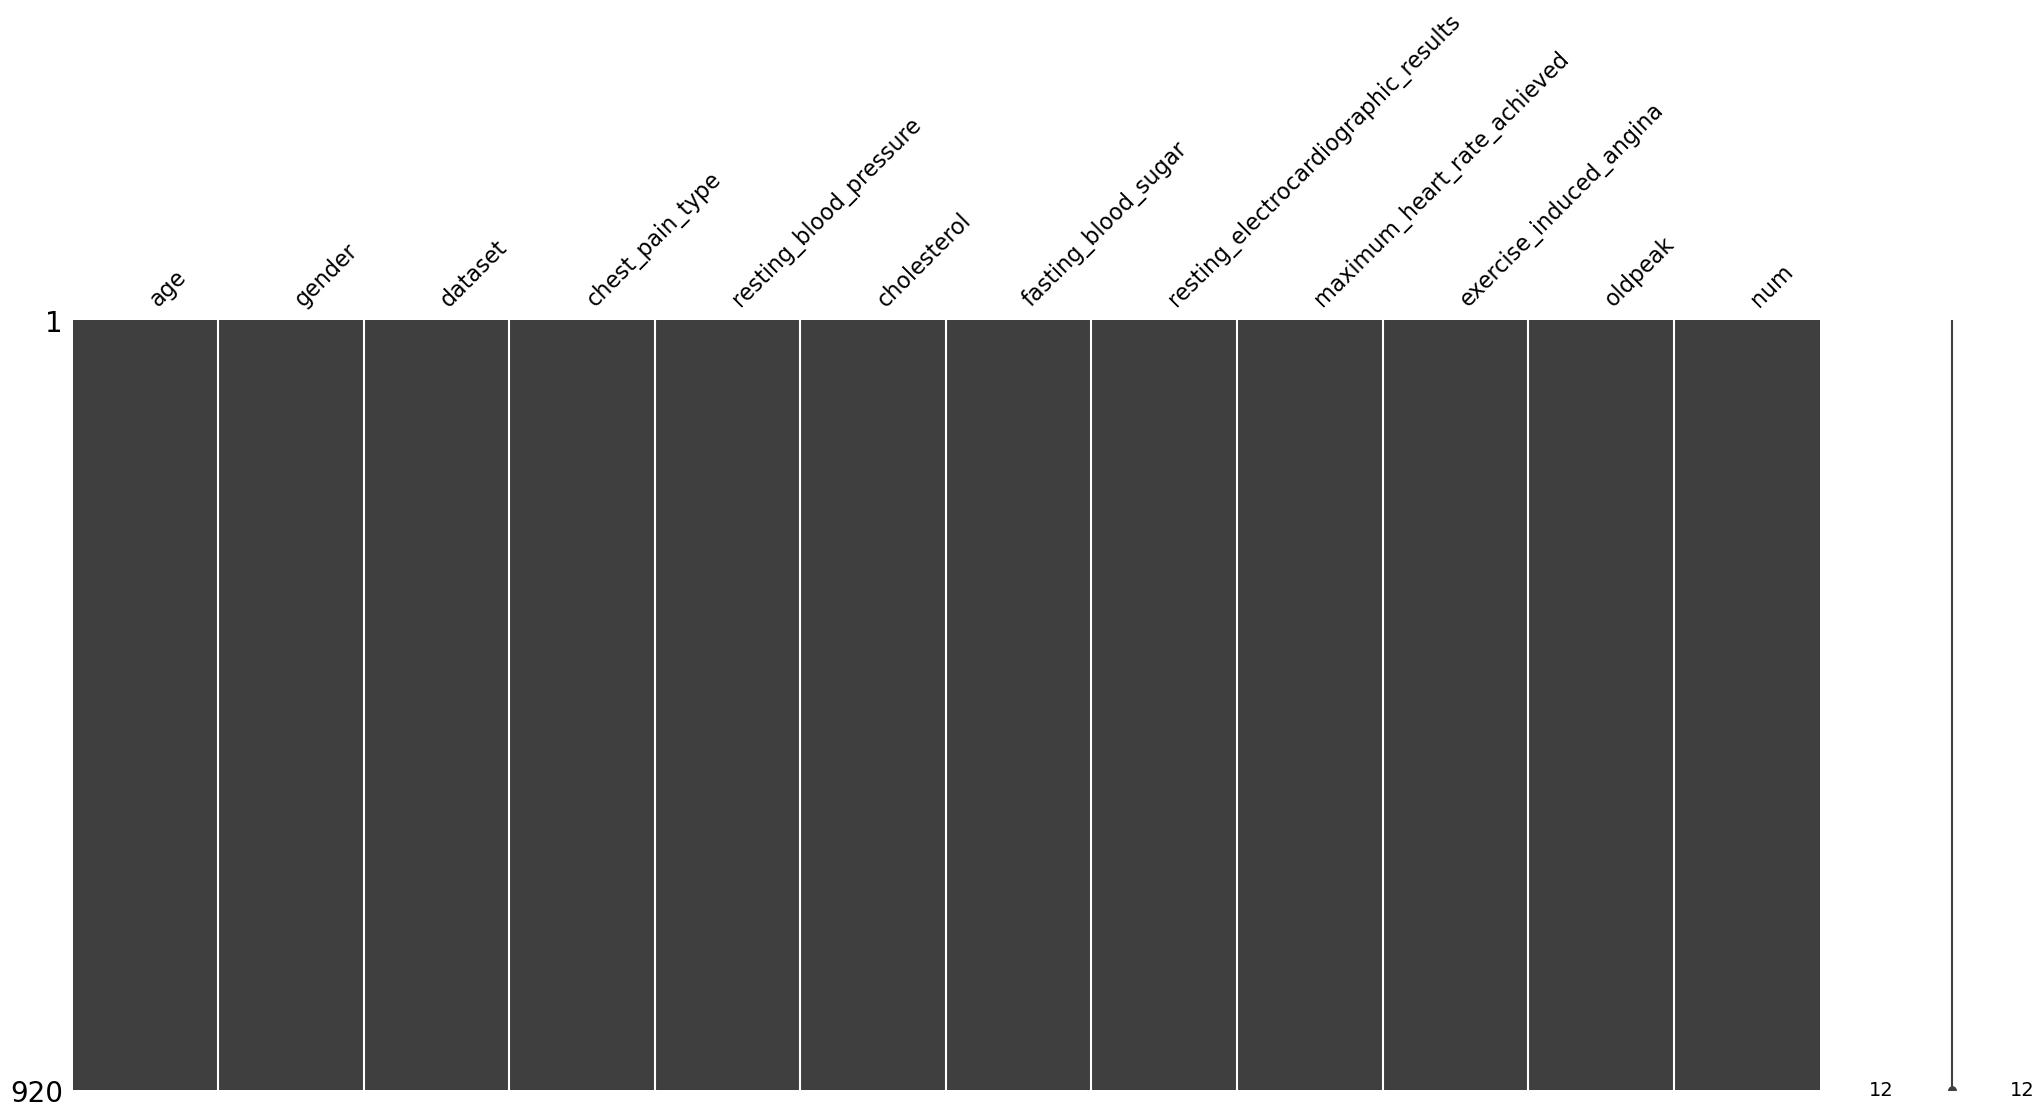

In [35]:
msno.matrix(df)

In [36]:
df[df.duplicated()]

,age,gender,dataset,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,num
405,49,Female,Hungary,atypical angina,110.0,199.130337,False,normal,160.0,False,0.0,0
907,58,Male,VA Long Beach,non-anginal,150.0,219.000000,False,st-t abnormality,118.0,True,0.0,2


In [39]:
df.duplicated().sum()

2

In [41]:
df.drop_duplicates(inplace = True)

In [43]:
# Data Cleaning:
# - Replace 0 values in resting_blood_pressure and cholesterol with the median
# - Fix oldpeak: convert any negative values to 0

df['resting_blood_pressure'] = df['resting_blood_pressure'].replace(0, df['resting_blood_pressure'].median())
df['cholesterol'] = df['cholesterol'].replace(0, df['cholesterol'].median())
df['oldpeak'] = df['oldpeak'].apply(lambda x: 0 if x < 0 else x)

df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

In [45]:
df['num'].value_counts()

num
1    508
0    410
Name: count, dtype: int64

In [49]:
df.describe()

,age,resting_blood_pressure,cholesterol,maximum_heart_rate_achieved,oldpeak,num
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.278662,240.516100,137.542496,0.894537,0.553377
std,9.432617,17.915948,53.241615,25.146684,1.032583,0.497414
min,28.000000,80.000000,85.000000,60.000000,0.000000,0.000000
25%,47.000000,120.000000,213.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,221.000000,138.000000,0.800000,1.000000
75%,60.000000,140.000000,267.000000,155.750000,1.500000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,1.000000


In [53]:
for cols in df.select_dtypes(exclude = 'number').columns:
    print(f'Name of column --> {cols}')
    print(f'unique of columns --> {df[cols].unique()}')
    print('_' * 50)

Name of column --> gender
unique of columns --> ['Male' 'Female']
__________________________________________________
Name of column --> dataset
unique of columns --> ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
__________________________________________________
Name of column --> chest_pain_type
unique of columns --> ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
__________________________________________________
Name of column --> fasting_blood_sugar
unique of columns --> [ True False]
__________________________________________________
Name of column --> resting_electrocardiographic_results
unique of columns --> ['lv hypertrophy' 'normal' 'st-t abnormality']
__________________________________________________
Name of column --> exercise_induced_angina
unique of columns --> [False  True]
__________________________________________________


In [55]:
df['num'].unique().tolist()

[0, 1]

In [57]:
# Save the cleaned dataset to a CSV file
df.to_csv('data_cleaning_heart_disease_uci.csv', index=False)

## EDA (Exploratory Data Analysis)

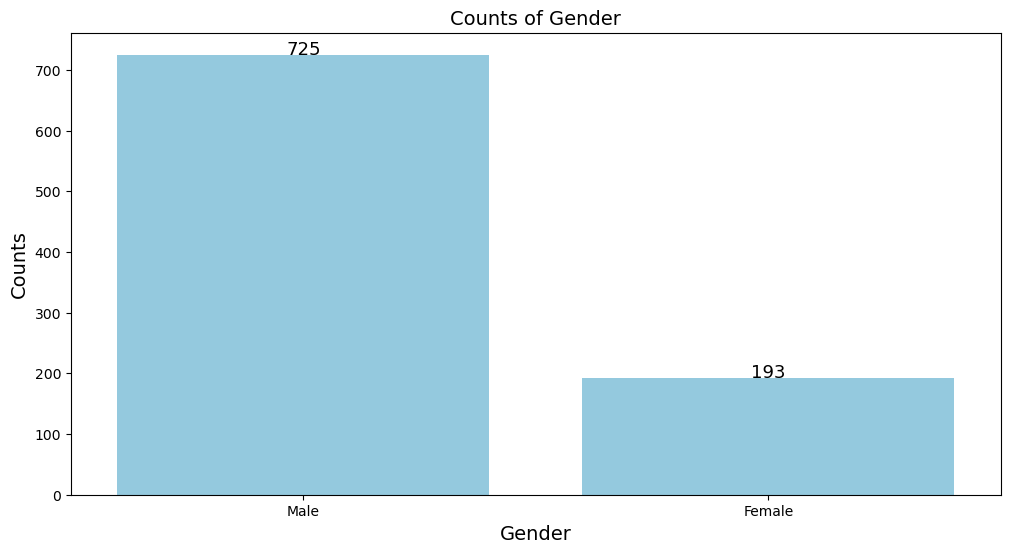

In [59]:
plt.figure(figsize = (12, 6))
ax = sns.countplot(data = df, x = 'gender', color = 'skyblue')

for i in ax.patches:
    ax.annotate(str(int(i.get_height())),
               (i.get_x() + i.get_width() / 2., i.get_height()),
               ha = 'center', fontsize = 13, color = 'k')

plt.title('Counts of Gender', fontsize = 14)
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

plt.show()

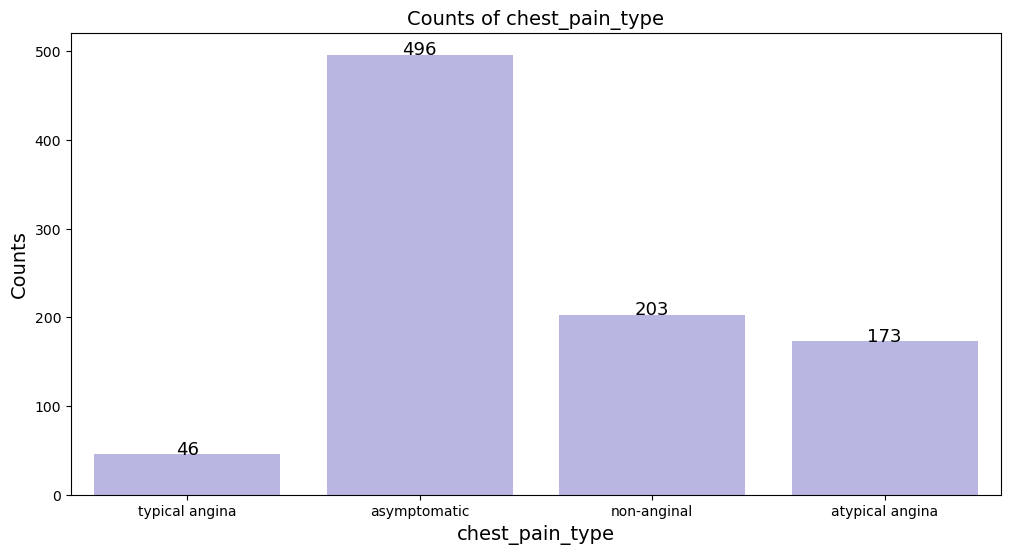

In [61]:
plt.figure(figsize = (12, 6))
ax = sns.countplot(data = df, x = 'chest_pain_type', color = '#B2B0E8')

for i in ax.patches:
    ax.annotate(str(int(i.get_height())),
               (i.get_x() + i.get_width() / 2., i.get_height()),
               ha = 'center', fontsize = 13, color = 'k')

plt.title('Counts of chest_pain_type', fontsize = 14)
plt.xlabel('chest_pain_type', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

plt.show()

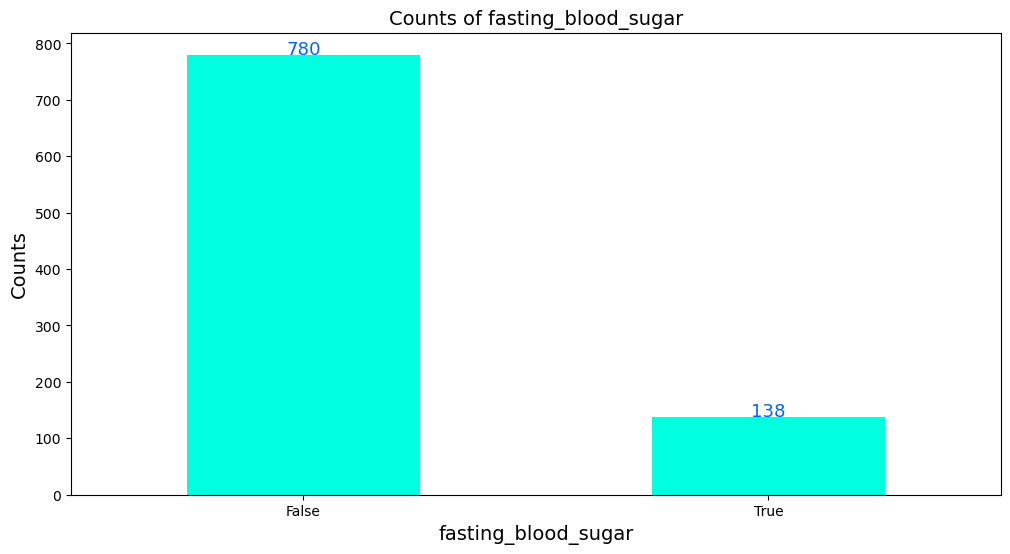

In [63]:
ax =  df['fasting_blood_sugar'].value_counts().plot(kind = 'bar', figsize = (12, 6), color = '#00FFDE')

for i in ax.patches:
    ax.annotate(str(int(i.get_height())),
               (i.get_x() + i.get_width() / 2., i.get_height()),
               ha = 'center', fontsize = 13, color = '#0065F8')

plt.title('Counts of fasting_blood_sugar', fontsize = 14)
plt.xlabel('fasting_blood_sugar', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.xticks(rotation = 0)
plt.show()

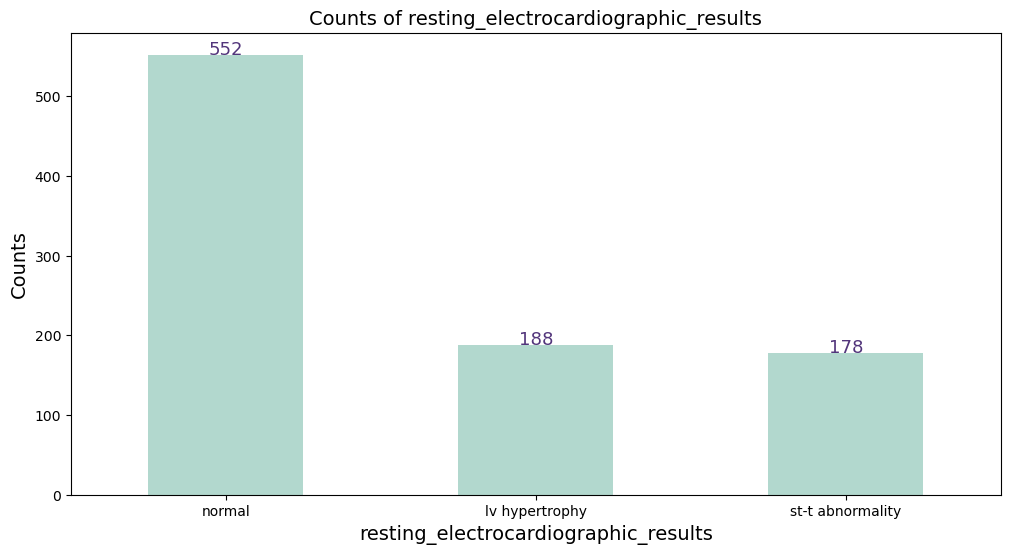

In [65]:
axs = df['resting_electrocardiographic_results'].value_counts().plot(kind = 'bar', figsize = (12, 6), color = '#B2D8CE')

for i in axs.patches:
    axs.annotate(str(int(i.get_height())),
               (i.get_x() + i.get_width() / 2., i.get_height()),
               ha = 'center', fontsize = 13, color = '#52357B')

plt.title('Counts of resting_electrocardiographic_results', fontsize = 14)
plt.xlabel('resting_electrocardiographic_results', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.xticks(rotation = 0)
plt.show()

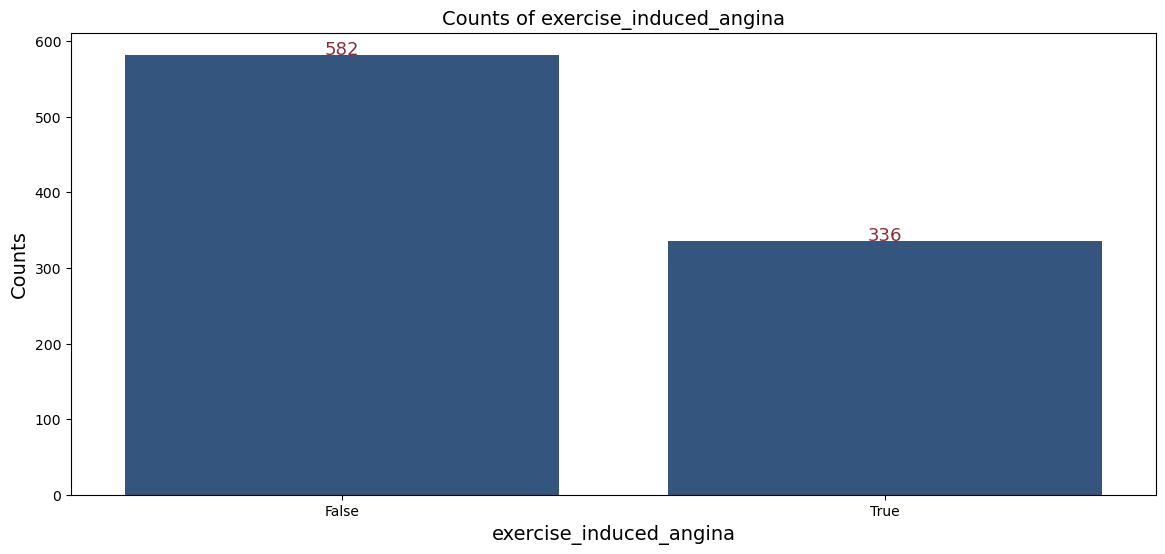

In [67]:
plt.figure(figsize = (14, 6))
ax = sns.countplot(data = df, x = 'exercise_induced_angina', color = '#27548A')

for i in ax.patches:
    ax.annotate(str(int(i.get_height())),
               (i.get_x() + i.get_width() / 2., i.get_height()),
               ha = 'center', fontsize = 13, color = '#8A2D3B')

plt.title('Counts of exercise_induced_angina', fontsize = 14)
plt.xlabel('exercise_induced_angina', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.xticks(rotation = 0)
plt.show()

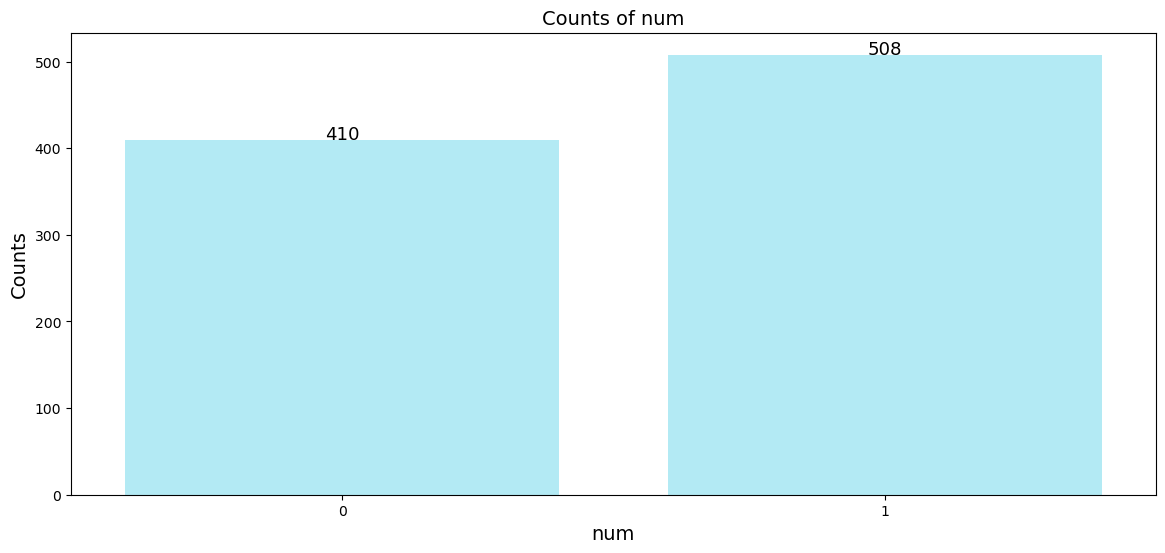

In [69]:
plt.figure(figsize = (14, 6))
ax = sns.countplot(data = df, x = 'num', color = '#A8F1FF')

for i in ax.patches:
    ax.annotate(str(int(i.get_height())),
               (i.get_x() + i.get_width() / 2., i.get_height()),
               ha = 'center', fontsize = 13, color = 'k')

plt.title('Counts of num', fontsize = 14)
plt.xlabel('num', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.xticks(rotation = 0)
plt.show()

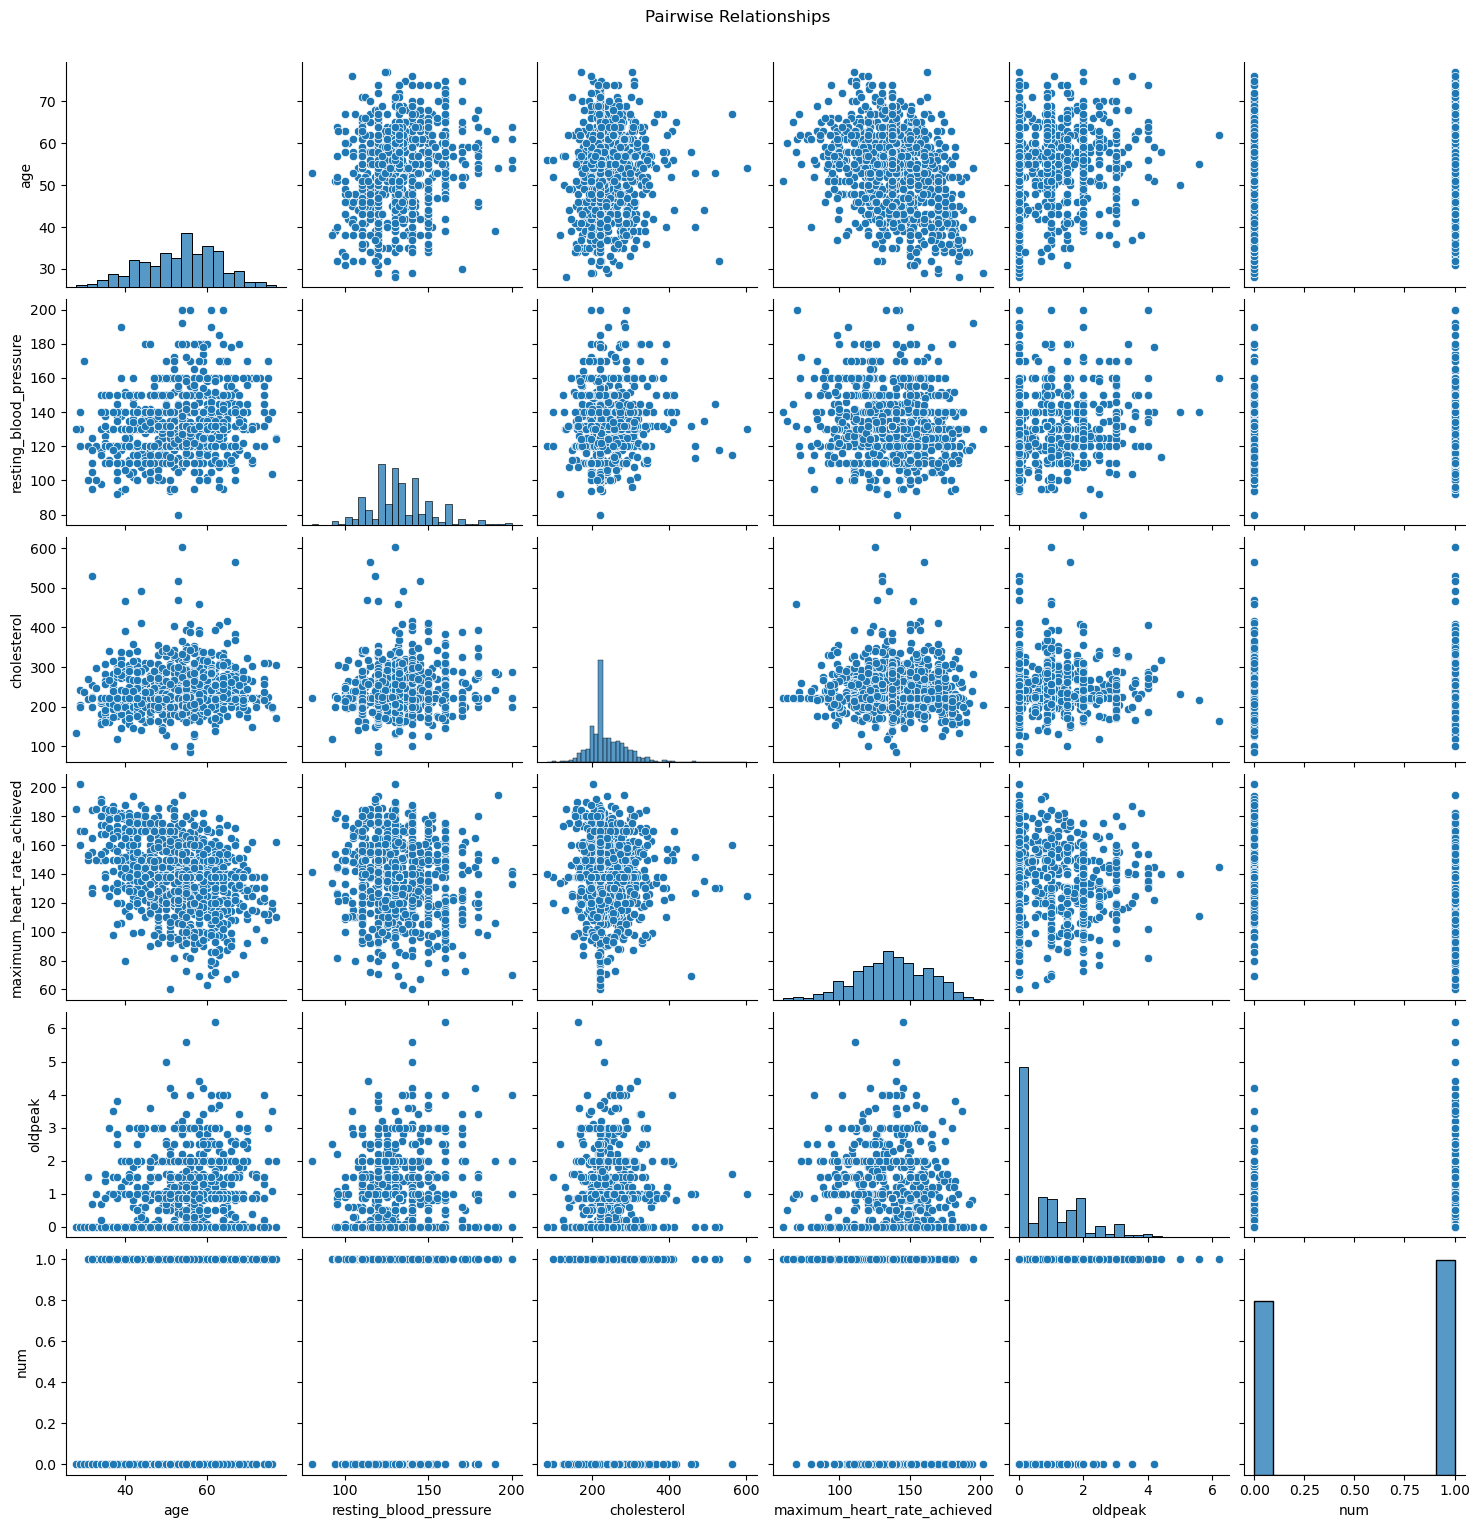

In [71]:
sns.pairplot(df, vars=['age', 'resting_blood_pressure', 'cholesterol', 'maximum_heart_rate_achieved', 'oldpeak', 'num'])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

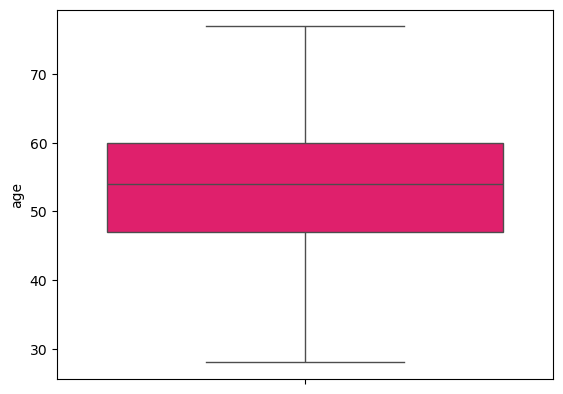

In [72]:
sns.boxplot(data = df, y = 'age', color = '#FF0066')
plt.show()

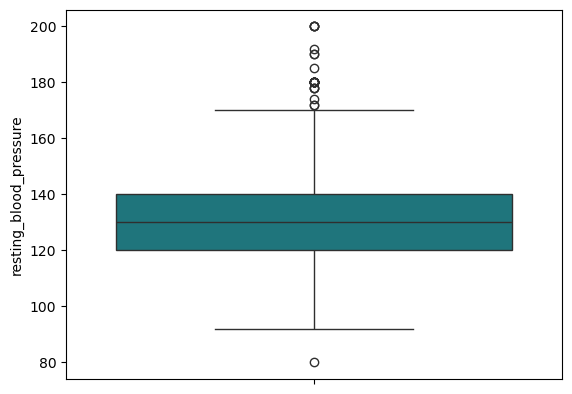

In [73]:
sns.boxplot(data = df, y = 'resting_blood_pressure', color = '#0F828C')
plt.show()

In [74]:
Q1 = df['resting_blood_pressure'].quantile(0.25)
Q2 = df['resting_blood_pressure'].quantile(0.50)
Q3 = df['resting_blood_pressure'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_resting_blood_pressure = df[(df['resting_blood_pressure'] < lower_bound) | (df['resting_blood_pressure'] > upper_bound)]
len(outliers_resting_blood_pressure)

27

In [75]:
df[df['resting_blood_pressure'] == df['resting_blood_pressure'].max()]

,age,gender,dataset,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,num
126,56,Female,Cleveland,asymptomatic,200.0,288.0,True,lv hypertrophy,133.0,True,4.0,1
548,54,Male,Hungary,asymptomatic,200.0,198.0,False,normal,142.0,True,2.0,1
680,61,Male,Switzerland,non-anginal,200.0,221.0,False,st-t abnormality,70.0,False,0.0,1
701,64,Female,Switzerland,asymptomatic,200.0,221.0,False,normal,140.0,True,1.0,1


In [76]:
df[df['resting_blood_pressure'] == df['resting_blood_pressure'].min()]

,age,gender,dataset,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,num
644,53,Male,Switzerland,asymptomatic,80.0,221.0,False,normal,141.0,True,2.0,0


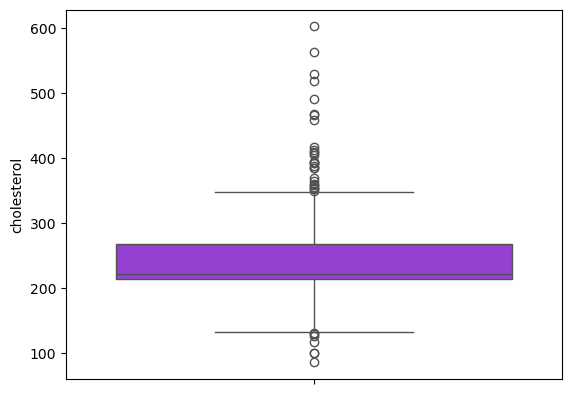

In [77]:
sns.boxplot(data = df, y = 'cholesterol', color = '#9929EA')
plt.show()

In [78]:
df['cholesterol'].median()

221.0

In [79]:
Q1 = df['cholesterol'].quantile(0.25)
Q2 = df['cholesterol'].quantile(0.50)
Q3 = df['cholesterol'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_cholesterol = df[(df['cholesterol'] < lower_bound) | (df['cholesterol'] > upper_bound)]
len(outliers_cholesterol)

35

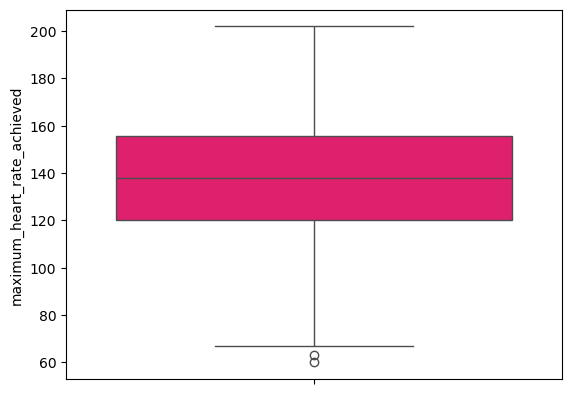

In [80]:
sns.boxplot(data = df, y = 'maximum_heart_rate_achieved', color = '#FF0066')
plt.show()

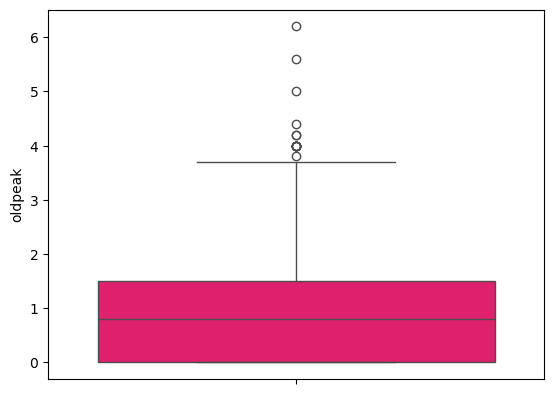

In [81]:
sns.boxplot(data = df, y = 'oldpeak', color = '#FF0066')
plt.show()

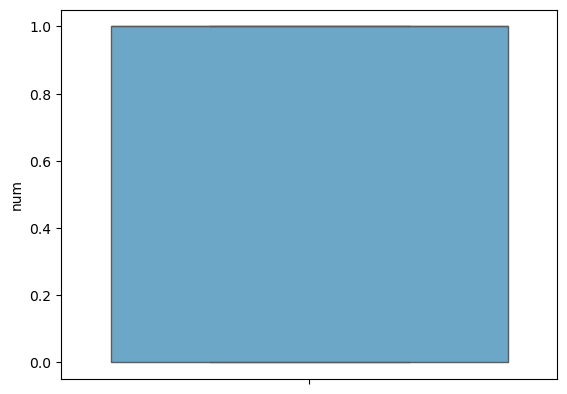

In [82]:
sns.boxplot(data = df, y = 'num', color = '#5EABD6')
plt.show()

C:\Users\mo\AppData\Local\Temp\ipykernel_11864\4006996360.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num', y='age', palette='Set2')


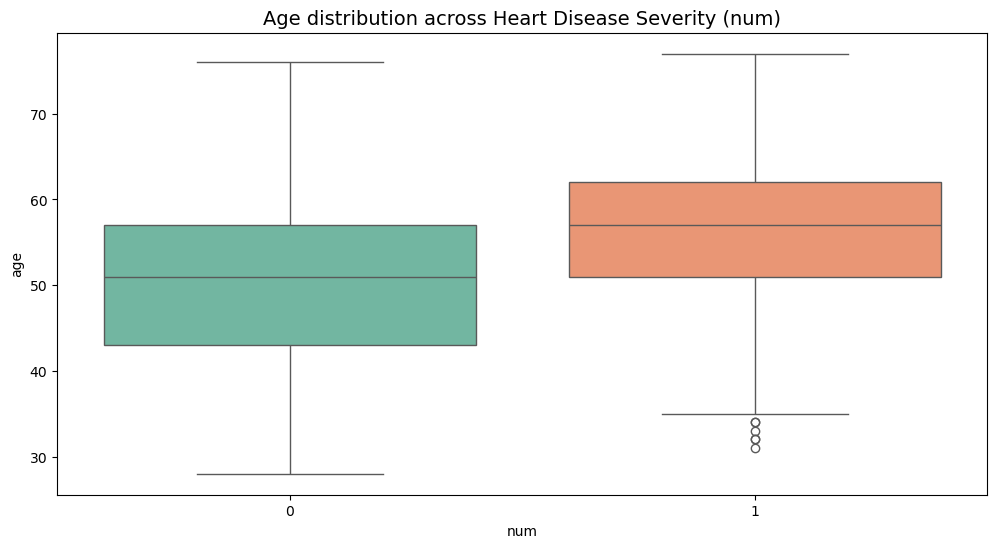

In [83]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='num', y='age', palette='Set2')
plt.title("Age distribution across Heart Disease Severity (num)", fontsize=14)
plt.show()

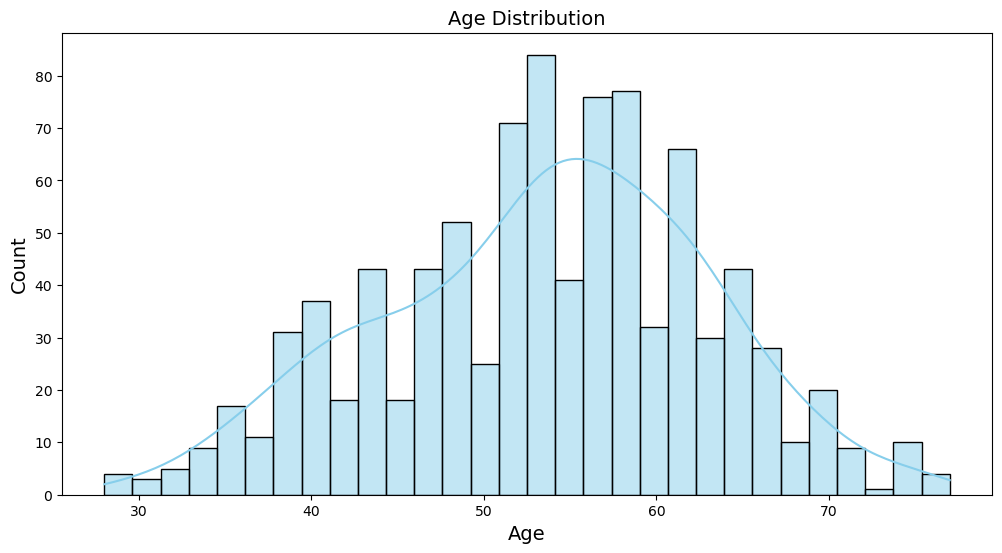

In [84]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', kde=True, color='skyblue', bins=30, cbar = True)
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

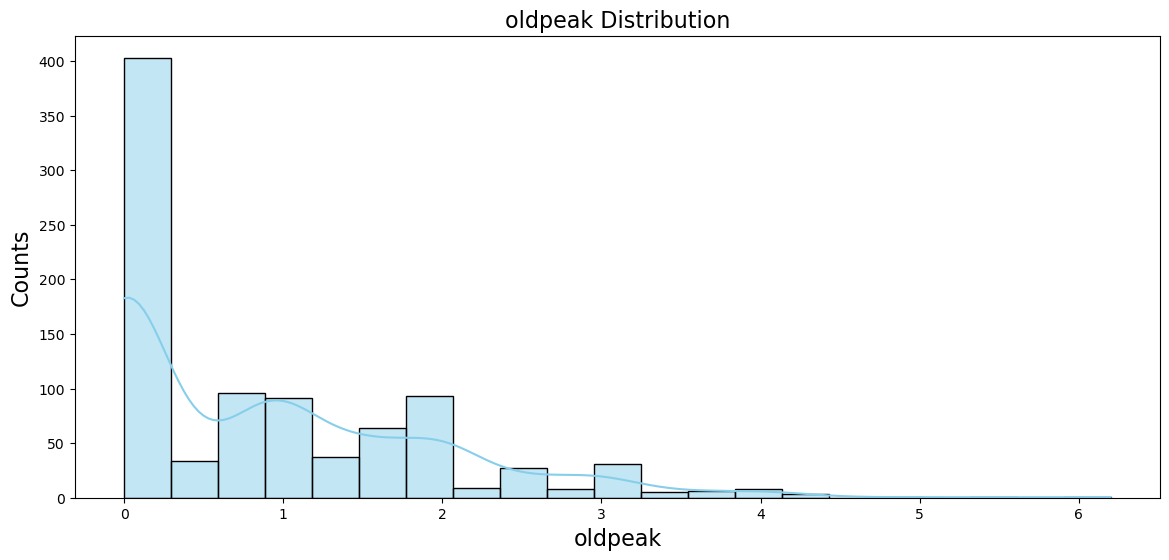

In [85]:
plt.figure(figsize = (14, 6))
sns.histplot(data = df, x = 'oldpeak', kde = True, color = 'skyblue')
plt.title('oldpeak Distribution', fontsize = 16)
plt.xlabel('oldpeak', fontsize = 16)
plt.ylabel('Counts', fontsize = 16)
plt.show()

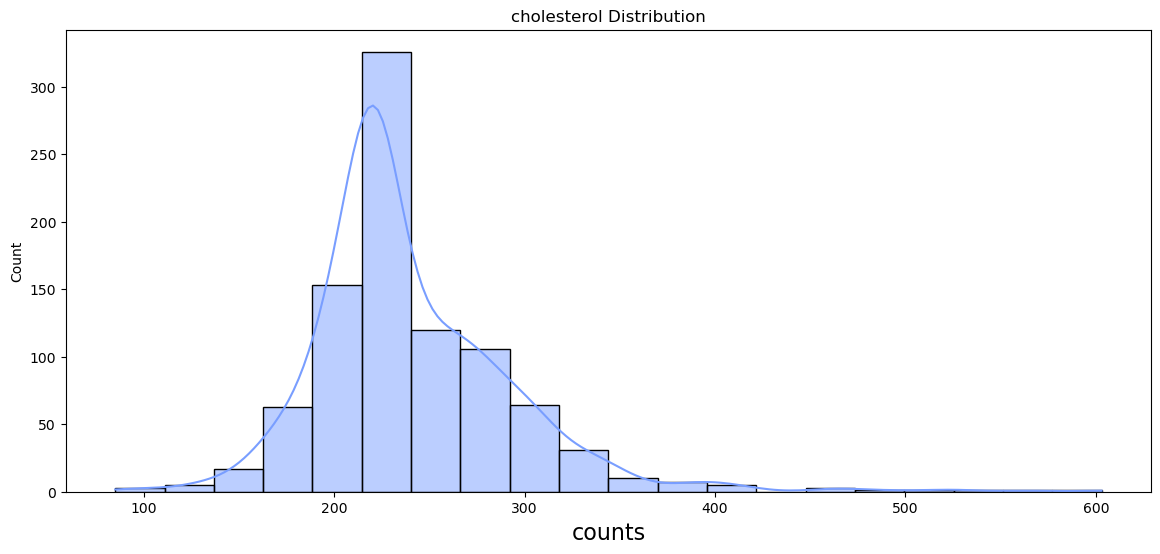

In [86]:
plt.figure(figsize = (14, 6))
sns.histplot(data = df, x = 'cholesterol', kde = True, color = '#799EFF', bins = 20)
plt.title('cholesterol Distribution')
plt.xlabel('cholesterol', fontsize = 16)
plt.xlabel('counts', fontsize = 16)
plt.show()

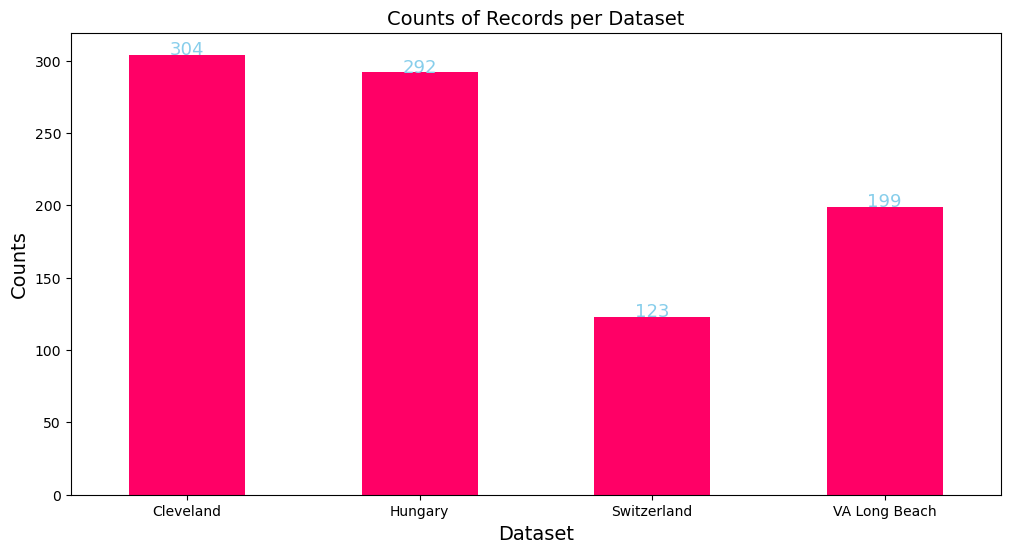

In [87]:
plt.figure(figsize=(12, 6))
ax = df.groupby('dataset')['num'].count().plot(kind='bar', color='#FF0066')

for i in ax.patches:
    ax.annotate(str(int(i.get_height())),
                (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', fontsize=13, color='skyblue')

plt.title('Counts of Records per Dataset', fontsize=14)
plt.xlabel('Dataset', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=0)
plt.show()


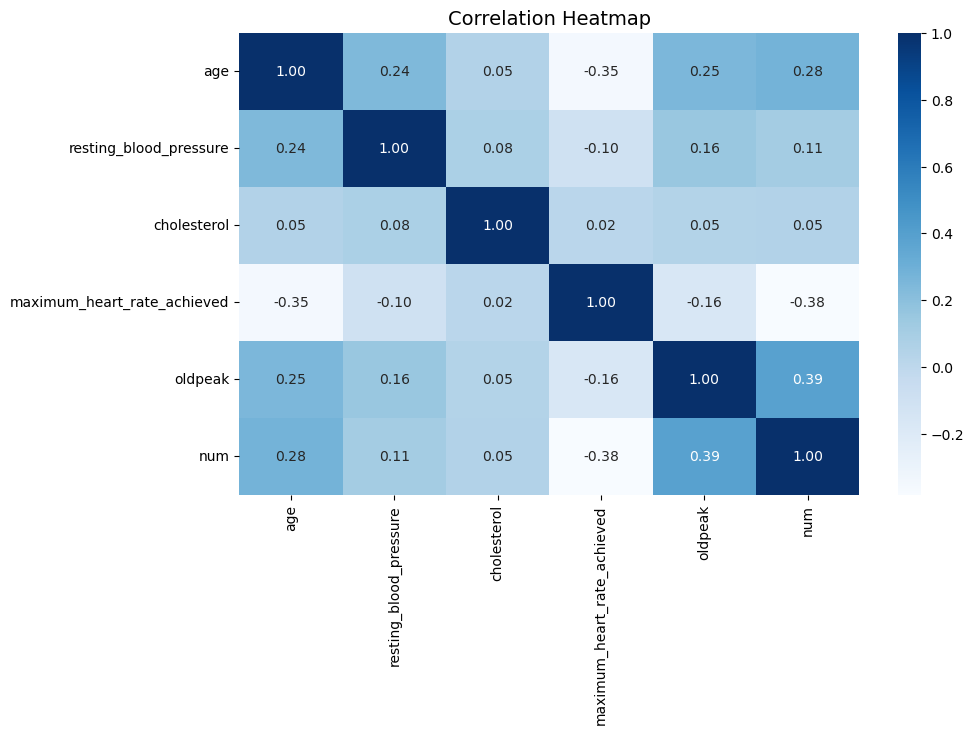

In [88]:
corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot = True, cmap = 'Blues', fmt = ".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

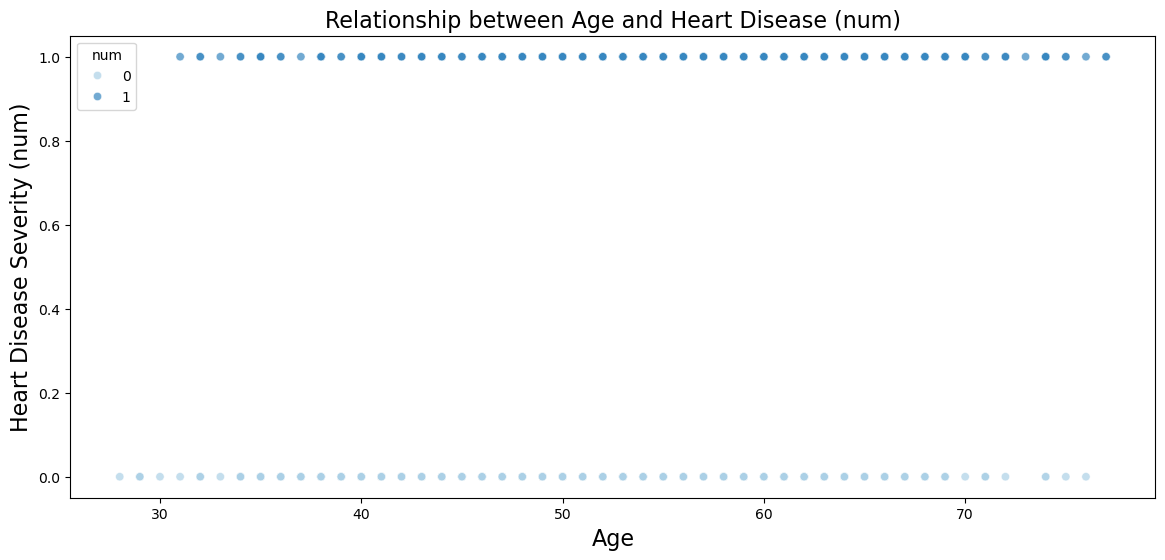

In [89]:
plt.figure(figsize=(14,6))
sns.scatterplot(data = df, x = 'age', y = 'num', hue = 'num', palette = 'Blues', alpha = 0.7)
plt.title('Relationship between Age and Heart Disease (num)', fontsize=16)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Heart Disease Severity (num)', fontsize=16)
plt.show()

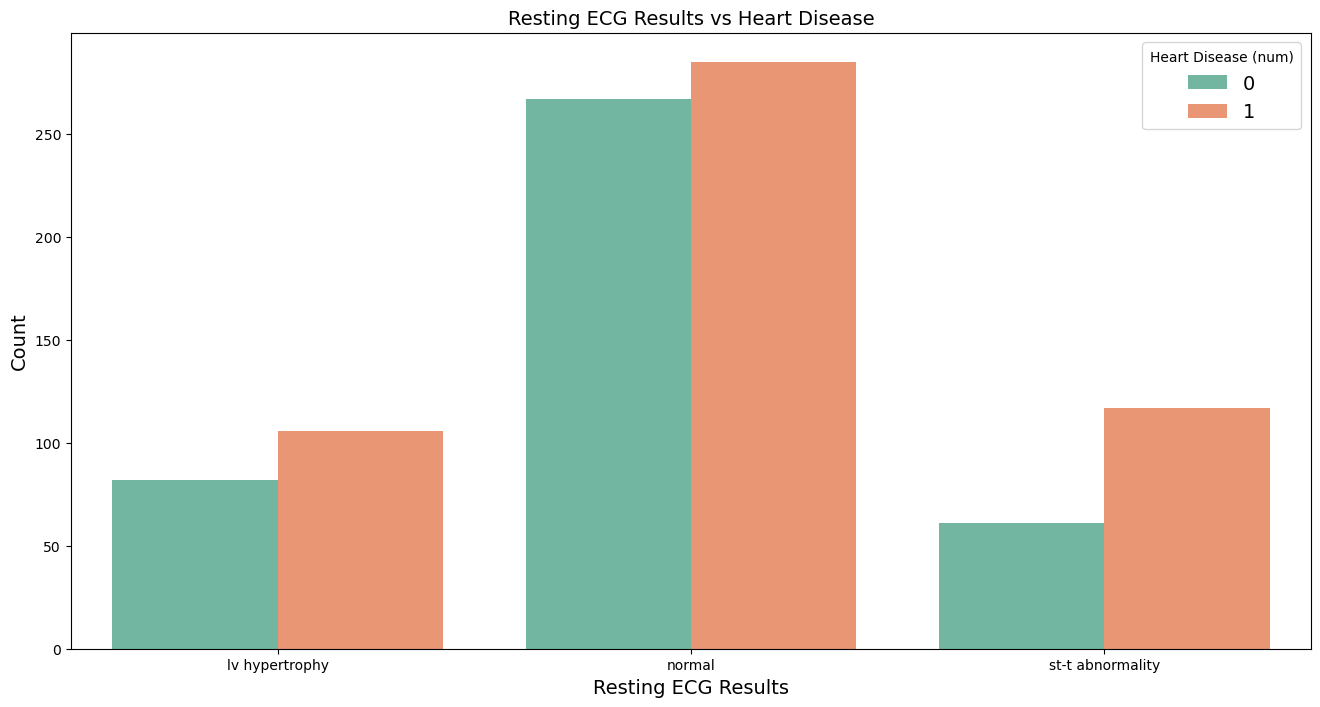

In [90]:
plt.figure(figsize=(16, 8))
sns.countplot(data = df, x = 'resting_electrocardiographic_results', hue = 'num', palette = 'Set2')
plt.title('Resting ECG Results vs Heart Disease', fontsize = 14)
plt.xlabel('Resting ECG Results', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.legend(title = 'Heart Disease (num)', fontsize = 14)
plt.show()

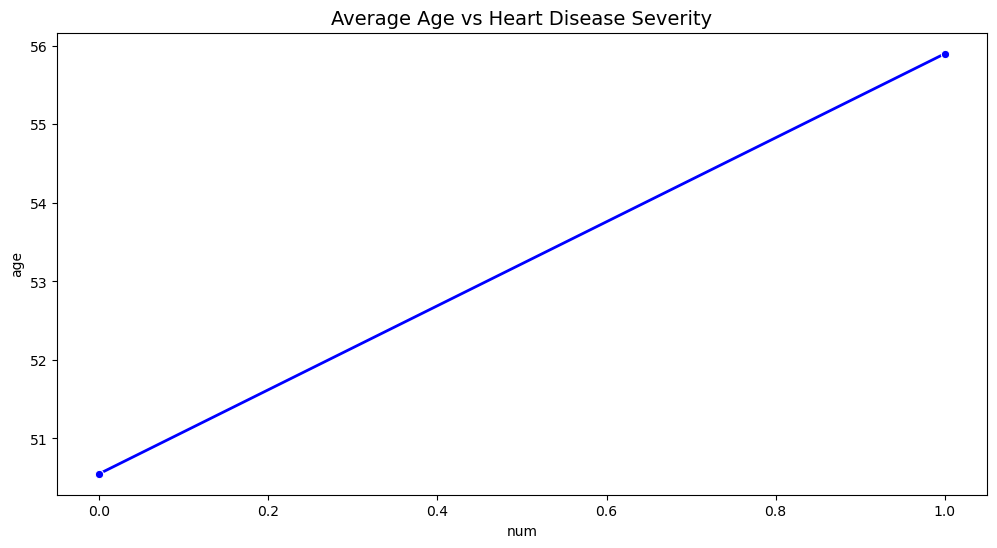

In [91]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df.groupby('num')['age'].mean().reset_index(),
    x='num',
    y='age',
    marker='o',
    linewidth=2,
    color='blue'
)
plt.title("Average Age vs Heart Disease Severity", fontsize=14)
plt.show()

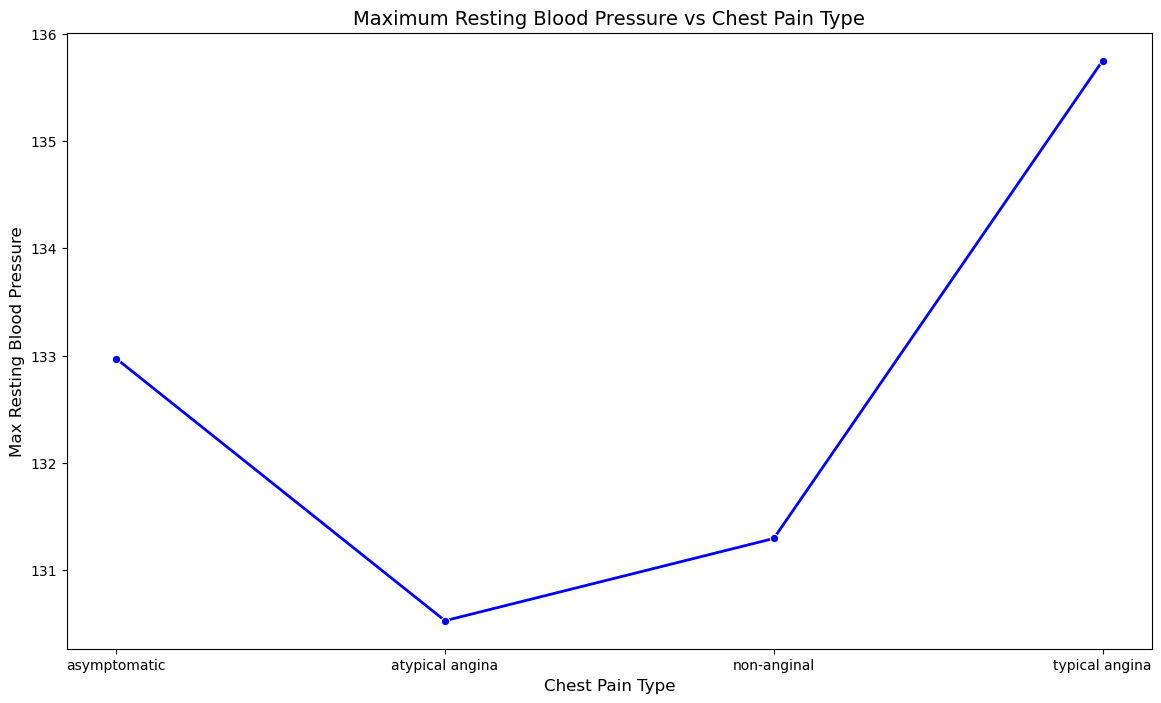

In [92]:
plt.figure(figsize=(14, 8))
sns.lineplot(
    data = df.groupby('chest_pain_type')['resting_blood_pressure'].mean().reset_index(),
    x='chest_pain_type',
    y='resting_blood_pressure',
    marker='o',
    linewidth=2,
    color='blue'
)
plt.title("Maximum Resting Blood Pressure vs Chest Pain Type", fontsize=14)
plt.xlabel("Chest Pain Type", fontsize=12)
plt.ylabel("Max Resting Blood Pressure", fontsize=12)
plt.show()

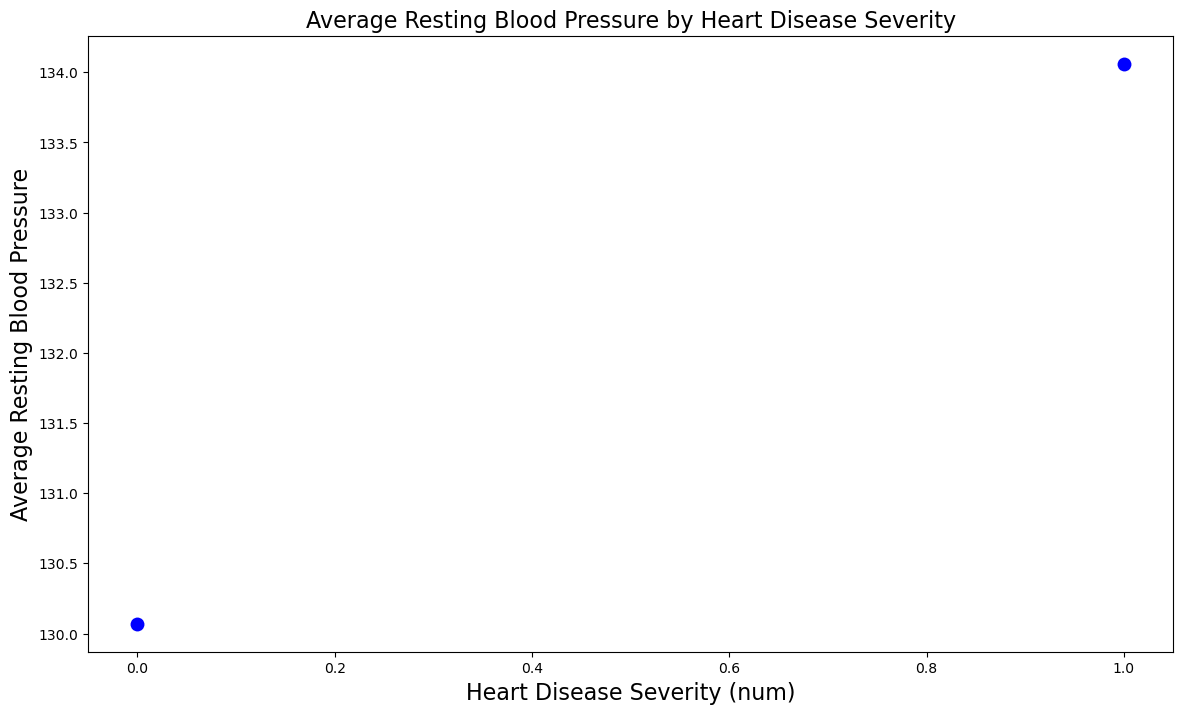

In [93]:
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df.groupby('num')['resting_blood_pressure'].mean().reset_index(),
    x='num',
    y='resting_blood_pressure',
    color='blue',
    s=100,
    marker='o',
    linewidth=0
)
plt.title("Average Resting Blood Pressure by Heart Disease Severity", fontsize=16)
plt.xlabel("Heart Disease Severity (num)", fontsize=16)
plt.ylabel("Average Resting Blood Pressure", fontsize=16)
plt.show()

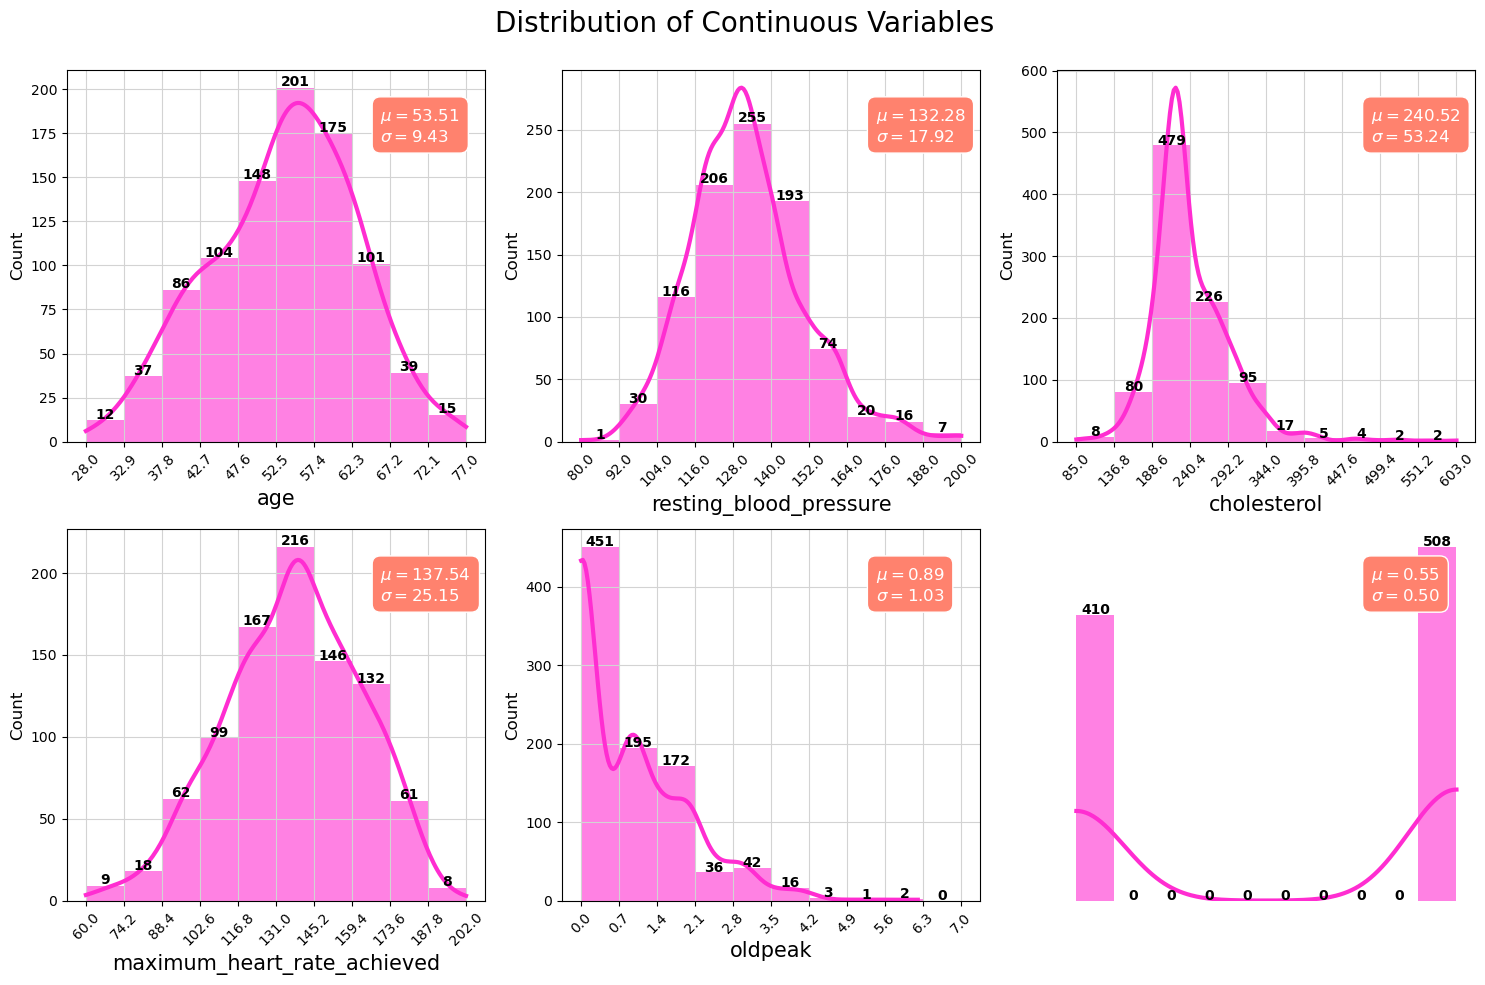

In [94]:
# 1. Extract continuous (numeric) features automatically
continuous_features = df.select_dtypes(include= 'number').columns.tolist()
df_continuous = df[continuous_features]

# 2. Set up the subplot grid
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

# 3. Loop through each continuous column
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(
        df_continuous[col],
        range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max()))
    )
    
    # Histogram with KDE
    graph = sns.histplot(
        data=df_continuous,
        x=col,
        bins=bin_edges,
        kde=True,
        ax=ax[x, y],
        edgecolor='none',
        color='#FF2DD1',
        alpha=0.6,
        line_kws={'lw': 3}
    )
    
    # Labels
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')
    
    # Add counts above bars
    for j, p in enumerate(graph.patches):
        ax[x, y].annotate(
            '{}'.format(int(p.get_height())),
            (p.get_x() + p.get_width() / 2, p.get_height() + 1),
            ha='center', fontsize=10, fontweight="bold"
        )
    
    # Add mean & std text box
    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(
        0.75, 0.9, textstr,
        transform=ax[x, y].transAxes,
        fontsize=12,
        verticalalignment='top',
        color='white',
        bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5)
    )

# Hide empty subplot if needed
ax[1, 2].axis('off')

# Title
plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

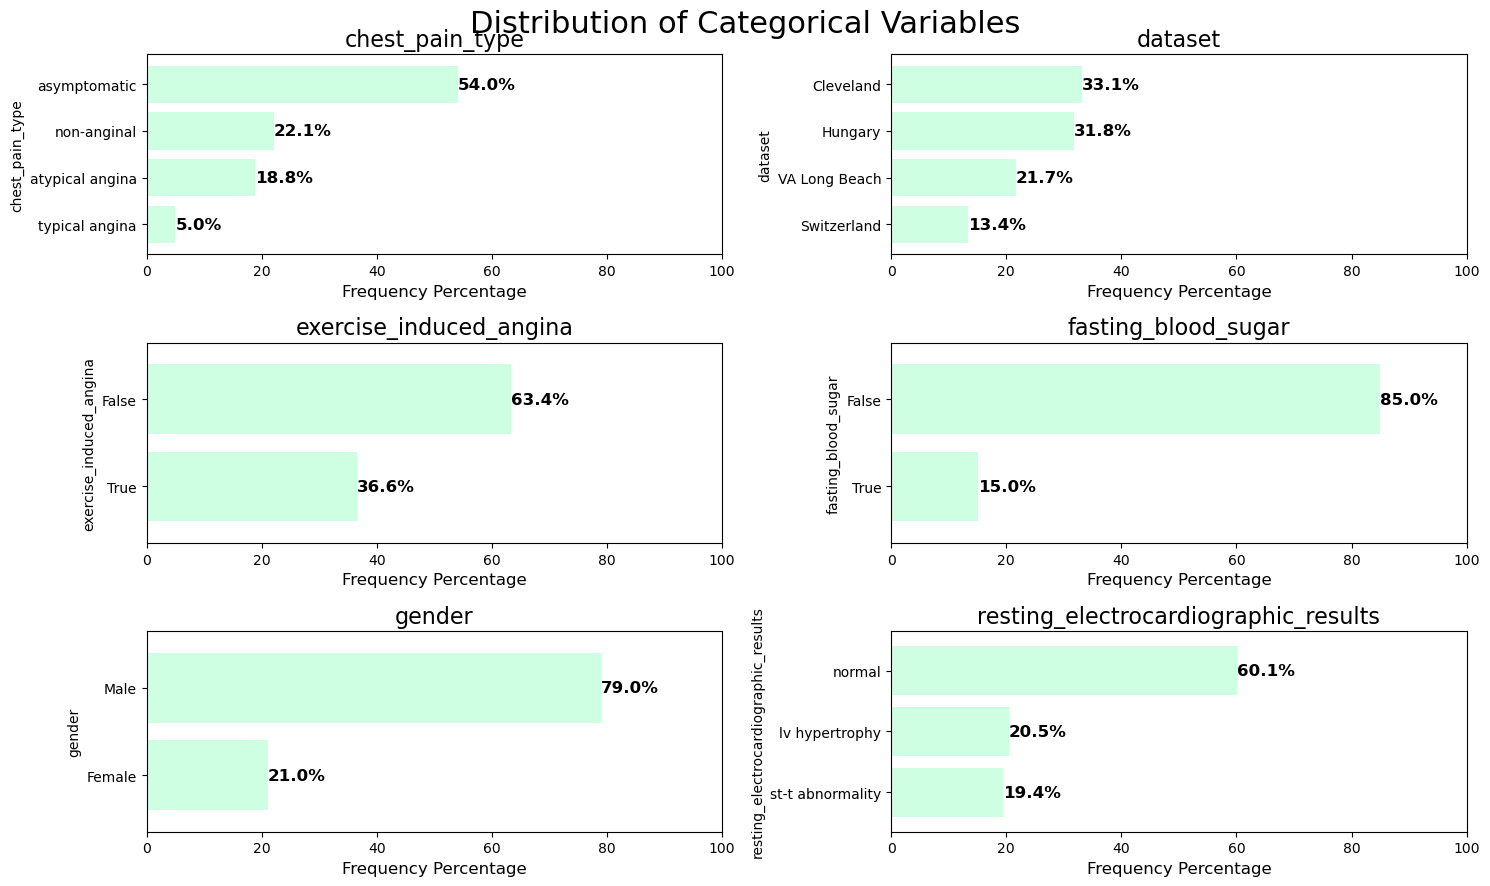

In [95]:
# Filter out categorical features for the univariate analysis
categorical_features = df.columns.difference(continuous_features)
df_categorical = df[categorical_features]

# Automatically set number of rows and columns for subplots
n_cols = 2
n_rows = int(np.ceil(len(categorical_features) / n_cols))

# Set up the subplot grid
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 3))

# Flatten axes array for easy iteration
ax = ax.flatten()

# Loop through categorical features
for i, col in enumerate(categorical_features):
    # Calculate frequency percentages
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()
    
    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[i], width=0.8, color='#CFFFE2')
    
    # Add frequency labels to the bars
    for index, value in enumerate(value_counts):
        ax[i].text(value, index, str(round(value, 1)) + '%',
                   fontsize=12, weight='bold', va='center')
    
    ax[i].set_xlim([0, 100])
    ax[i].set_xlabel('Frequency Percentage', fontsize=12)
    ax[i].set_title(f'{col}', fontsize=16)

# Hide extra empty subplots if they exist
for j in range(len(categorical_features), len(ax)):
    ax[j].axis('off')

plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()